In [1]:
#libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


#import data
df = pd.read_csv(r'C:\Users\colin\Desktop\data\Excel\Elo_rating_system\Player_tbl.csv', sep=';')

Commencons par l’idée la plus simple, chaque victoire donne 1 point au vainqueur

In [14]:
players = df['Name'].to_list()

ratings = pd.Series(0.0, index=players)

nb_rounds = 2000

df_score_01 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        lvl_A = int(df[df['Name'] == pA].iloc[0]['Level'])
        lvl_B = int(df[df['Name'] == pB].iloc[0]['Level'])

        prob_pA_win = lvl_A / (lvl_A + lvl_B)

        win_pA = np.random.choice([1, 0], p=[prob_pA_win, 1- prob_pA_win])

        if win_pA:
            ratings[pA] += 1
        else:
            ratings[pB] += 1

    df_score_01[f'Round {i+1}'] = ratings

df_score_01

Round 1  Round 2  Round 3  Round 4  Round 5  Round 6  Round 7  \
Abdul          1.0      1.0      1.0      1.0      1.0      1.0      1.0   
Alexandre      0.0      0.0      0.0      1.0      1.0      1.0      1.0   
Ali            0.0      1.0      1.0      1.0      1.0      2.0      2.0   
Anita          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Anna           0.0      0.0      1.0      1.0      2.0      2.0      2.0   
Antonio        1.0      2.0      2.0      2.0      2.0      2.0      2.0   
Barbara        0.0      1.0      1.0      2.0      3.0      3.0      4.0   
Carlos         1.0      1.0      1.0      2.0      2.0      2.0      2.0   
Charles        0.0      0.0      1.0      2.0      2.0      2.0      2.0   
Daniel         0.0      1.0      1.0      2.0      3.0      3.0      4.0   
David          1.0      1.0      1.0      1.0      1.0      2.0      3.0   
Elena          1.0      2.0      2.0      2.0      2.0      2.0      2.0   
Elizabeth      0.0      0.0      1.0      1.0      2.0      3.0      3.0   
Francis        0.0      0.0      1.0      2.0      3.0      4.0      5.0   
George         1.0      1.0      2.0      2.0      3.0      4.0      5.0   
James          1.0      1.0      1.0      1.0      1.0      1.0      2.0   
Jean           1.0      2.0      3.0      3.0      4.0      5.0      6.0   
John           0.0      1.0      1.0      1.0      2.0      3.0      4.0   
Joseph         1.0      2.0      2.0      2.0      2.0      3.0      3.0   
Laura          1.0      1.0      2.0      3.0      4.0      4.0      5.0   
Lei            0.0      1.0      1.0      2.0      3.0      4.0      4.0   
Lola           0.0      0.0      1.0      2.0      2.0      3.0      3.0   
Louis          1.0      2.0      2.0      3.0      4.0      4.0      5.0   
Marie          1.0      2.0      2.0      2.0      3.0      3.0      3.0   
Martha         0.0      1.0      2.0      3.0      4.0      4.0      4.0   
Michael        0.0      0.0      1.0      1.0      2.0      3.0      3.0   
Min            1.0      1.0      1.0      2.0      2.0      3.0      4.0   
Olga           0.0      1.0      2.0      3.0      3.0      4.0      5.0   
Paul           1.0      2.0      2.0      3.0      3.0      4.0      5.0   
Peter          0.0      0.0      1.0      1.0      1.0      1.0      1.0   
Richard        1.0      1.0      1.0      2.0      3.0      4.0      4.0   
Rita           1.0      2.0      3.0      4.0      4.0      4.0      5.0   
Robert         1.0      1.0      1.0      1.0      2.0      3.0      4.0   
Rose           0.0      1.0      2.0      2.0      2.0      3.0      4.0   
Sarah          1.0      2.0      3.0      3.0      4.0      4.0      4.0   
Thomas         0.0      0.0      1.0      2.0      2.0      3.0      4.0   
Victor         1.0      1.0      2.0      3.0      4.0      4.0      5.0   
William        1.0      2.0      3.0      3.0      4.0      5.0      5.0   
Yan            0.0      1.0      2.0      3.0      3.0      4.0      5.0   
Zoe            0.0      1.0      2.0      3.0      4.0      4.0      5.0   

           Round 8  Round 9  Round 10  ...  Round 1991  Round 1992  \
Abdul          1.0      1.0       1.0  ...       152.0       152.0   
Alexandre      2.0      2.0       2.0  ...       266.0       266.0   
Ali            2.0      2.0       2.0  ...       356.0       356.0   
Anita          0.0      1.0       1.0  ...       405.0       406.0   
Anna           2.0      2.0       2.0  ...       500.0       500.0   
Antonio        2.0      2.0       2.0  ...       549.0       549.0   
Barbara        4.0      5.0       5.0  ...       609.0       610.0   
Carlos         3.0      3.0       3.0  ...       675.0       675.0   
Charles        3.0      4.0       4.0  ...       764.0       764.0   
Daniel         5.0      5.0       6.0  ...       761.0       761.0   
David          4.0      4.0       5.0  ...       830.0       830.0   
Elena          2.0      2.0       3.0  ...       852.0

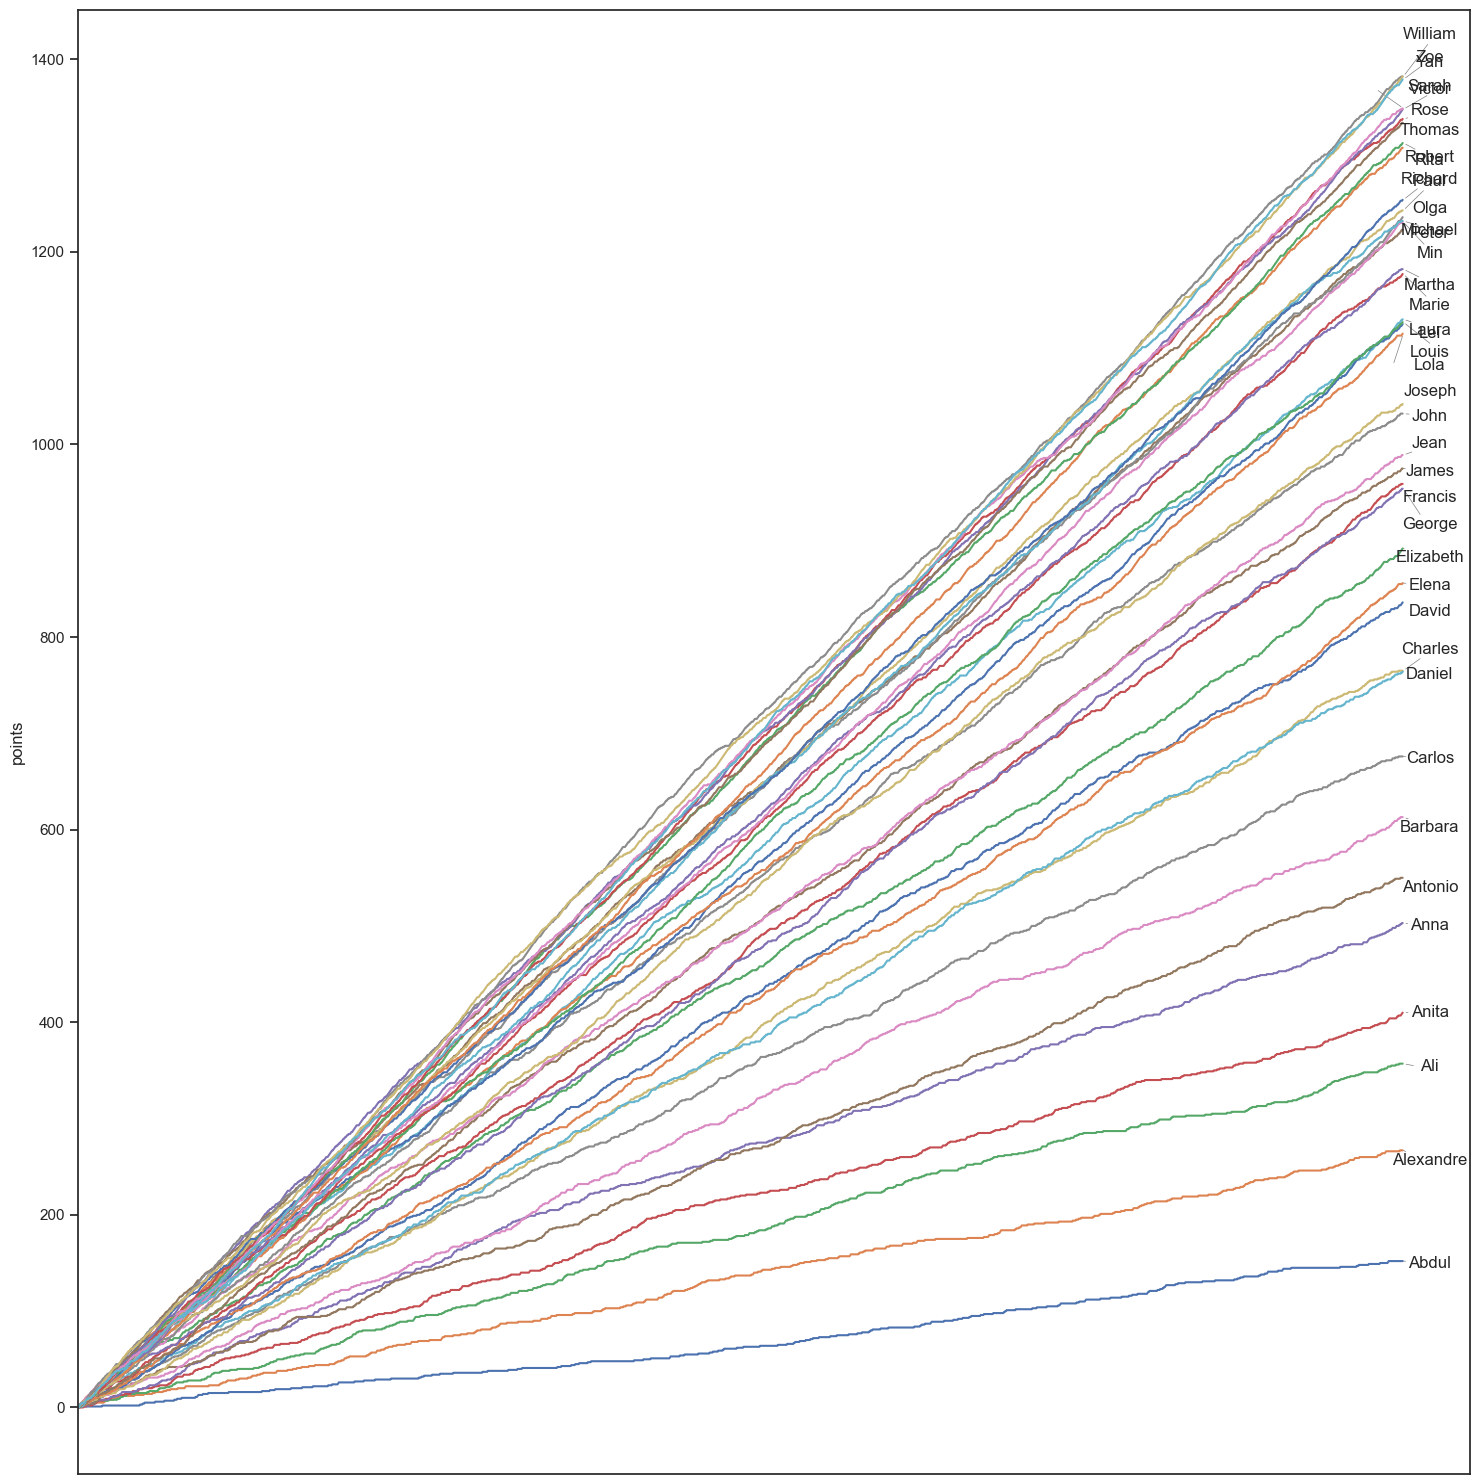

In [16]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_01.columns)

texts=[]

for player in df_score_01.index:
    scores = df_score_01.loc[player]
    plt.plot(df_score_01.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label + 40)

plt.xlim(-1, x_label + 100)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

C’est un bon début, les joueurs les plus forts sont bien ceux comptabilisant le plus grand nombre de points, on observe cependant deux problèmes ici, les points ne se stabilisent pas, il s’agit juste d’un cumul de point au fur et à mesure que le nombre de match augmente, et rien n’empêcherai un joueur moyen de jouer en continu contre le joueur le plus faible afin d’accumuler beaucoup de points ce qui rompt la fiabilité de notre système. Ce que l’on veut, c’est un système dont la note de chaque joueur converge vers une valeur qui reflète son véritable niveau. 
L’une des choses que nous avons oubliés ici c’est la notion d’équilibrage. Peut importe les joueurs qui s’affrontent, le gagnant remporte toujours un point. Or, il parait logique que le premier du classement gagne face au dernier et à l’inverse, on ne peut pas s’attendre à ce qu’un joueur faible gagne aux meilleurs joueurs. Dans ces deux cas, on comprend bien que le joueur le plus fort ne peut pas être récompensé au détriment d’un joueur bien plus faible qui lui se verrai pénalisé.
En revanche si un joueur classé plus faible bat son adversaire classé plus fort cela devrait donner lieu à pas mal de points car ça signifie que ce joueur était plus fort que ce que sa notation actuelle suggérait ou que l'autre était plus faible que prévu.
Voyons comment cela se traduit. Commençons par calculer la chance de victoire d’un joueur. On note x la notation de sa performance réelle et y celle de son adversaire. Le taux de victoire attendu sera donc le résultat de cette formule :


\begin{equation*}
P(x)=\frac{x}{\Bigl(x+y)}
\end{equation*}

Cette valeur comprise entre 0 et 1 peut nous aider pour la distribution des points, le gagnant recevra donc 1-P(x) et le perdant 0-P(x). Evidemment, d’une partie à l’autre le score de chaque joueur continuera de bouger, mais il aura tendance à converger vers une note qui reflète ses performances. Donnons 100 points de départs à chaque joueur et notons l’évolution de leur score.

In [17]:
players = df['Name'].to_list()
ratings = pd.Series(100.0, index=players)

nb_rounds = 2000

df_score_02 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        estimate_pA = ratings[pA]
        estimate_pB =ratings[pB]
        
        estimate_prob_pA_win = estimate_pA / (estimate_pA + estimate_pB)

        lvl_pA = df[df['Name'] == pA].iloc[0]['Level']
        lvl_pB = df[df['Name'] == pB].iloc[0]['Level']

        real_prob_pA_win = lvl_pA / (lvl_pA + lvl_pB)

        win_pA = np.random.choice([1, 0], p=[real_prob_pA_win, 1- real_prob_pA_win])

        if win_pA:
            ratings[pA] += 1 - estimate_prob_pA_win
            ratings[pB] += 0 - ( 1 - estimate_prob_pA_win)
        else:
            ratings[pB] += 1 - (1 - estimate_prob_pA_win)
            ratings[pA] += 0 - estimate_prob_pA_win

    df_score_02[f'Round {i+1}'] = ratings.copy()

df_score_02

Round 1   Round 2     Round 3     Round 4     Round 5     Round 6  \
Abdul         99.5   99.0000   98.505000   98.012481   97.519968   97.025012   
Alexandre     99.5   99.0000   98.504994   98.010012   97.517518   97.020025   
Ali           99.5   99.0000   98.502513   99.007537   98.510031   98.015024   
Anita         99.5  100.0025   99.504975  100.007456   99.507438  100.002394   
Anna          99.5   99.0025   98.505006   98.007525   97.517481   97.017469   
Antonio       99.5   99.0025   98.505006   98.007525   97.512550   98.012563   
Barbara      100.5   99.9975  100.499988  100.999988  100.499982  100.002445   
Carlos        99.5   99.0025   98.505006   98.010012   97.515037   97.025025   
Charles       99.5  100.0000   99.502481   99.007432   98.509932   98.014944   
Daniel       100.5   99.9975  100.497512  100.992500  100.490043   99.987562   
David        100.5  101.0000  101.495000  101.992525  101.485087  100.987526   
Elena         99.5  100.0000  100.497494   99.999963  100.504889  100.999877   
Elizabeth     99.5   99.0025   98.507487   98.012500   97.519981   97.029968   
Francis       99.5   99.0000   98.502506   98.007519   98.512538   99.015037   
George       100.5  100.9975  101.492506  101.987556  101.485105  100.985117   
James        100.5  101.0000  100.500000  100.000000  100.497506  100.992513   
Jean         100.5  101.0000  101.500000  100.997519  101.497525  100.995055   
John         100.5  100.0000  100.499994  100.997487  101.495006  101.992543   
Joseph        99.5  100.0025   99.502488   99.999969   99.502450   98.999951   
Laura         99.5  100.0000   99.497494   98.999988   98.502494   99.007531   
Lei           99.5   99.0025   99.505006  100.005000  100.507456  100.002419   
Lola         100.5  100.9975  101.492513  101.990049  102.480093  102.977654   
Louis        100.5   99.9975   99.497506   99.000013   98.500006   98.997500   
Marie         99.5  100.0025   99.502488   99.999969  100.499987   99.997512   
Martha       100.5  100.9975  100.495012   99.997488  100.492463  100.992494   
Michael      100.5  100.0000   99.502488   99.002494   99.509932  100.012407   
Min           99.5  100.0000  100.497487   99.999950  100.494926  100.997371   
Olga         100.5   99.9975  100.494994  100.992500  101.485013  100.985055   
Paul          99.5  100.0025   99.502500  100.002487  100.504963  100.004931   
Peter        100.5  100.0000  100.497494   99.995012   99.489994   98.994957   
Richard       99.5  100.0025  100.502500  100.997481  101.489975  101.989963   
Rita         100.5   99.9975   99.497512  100.002482  100.499982  101.002451   
Robert       100.5  100.9975  101.495025  101.992556  101.490111  101.980123   
Rose         100.5   99.9975   99.497512   98.997525   99.497531  100.000013   
Sarah        100.5   99.9975  100.497512  100.999994  101.502439  102.002396   
Thomas       100.5  101.0000  101.497512  101.990031  101.485105  101.980142   
Victor       100.5  100.9975  101.495019  100.990050  101.482568  100.980123   
William       99.5  100.0025  100.502488   99.997463  100.494956  100.994956   
Yan           99.5  100.0025  100.502488  100.997475  100.495000   99.995000   
Zoe          100.5  100.0000  100.497494  100.992488  101.494939  101.984952   

              Round 7     Round 8     Round 9    Round 10  ...  Round 1991  \
Abdul       96.535012   96.040068   95.545201   95.057801  ...    3.732082   
Alexandre   96.527581   96.040123   95.555097   95.070139  ...   10.278388   
Ali         97.520043   97.027555   96.542400   96.057293  ...   15.322874   
Anita       99.502376   99.002351   98.504826   99.012265  ...   19.635879   
Anna        96.520020   97.027596   97.540057   97.052406  ...   27.271271   
Antonio     98.510012   99.017480   98.524855   98.024861  ...   27.806892   
Barbara     99.504895   99.004920   98.509834   98.017242  ...   30.618679   
Carlos      96.530056   97.045041   96.557439   96.065012  ...   36.897314   
Charles     97.522425   98.0

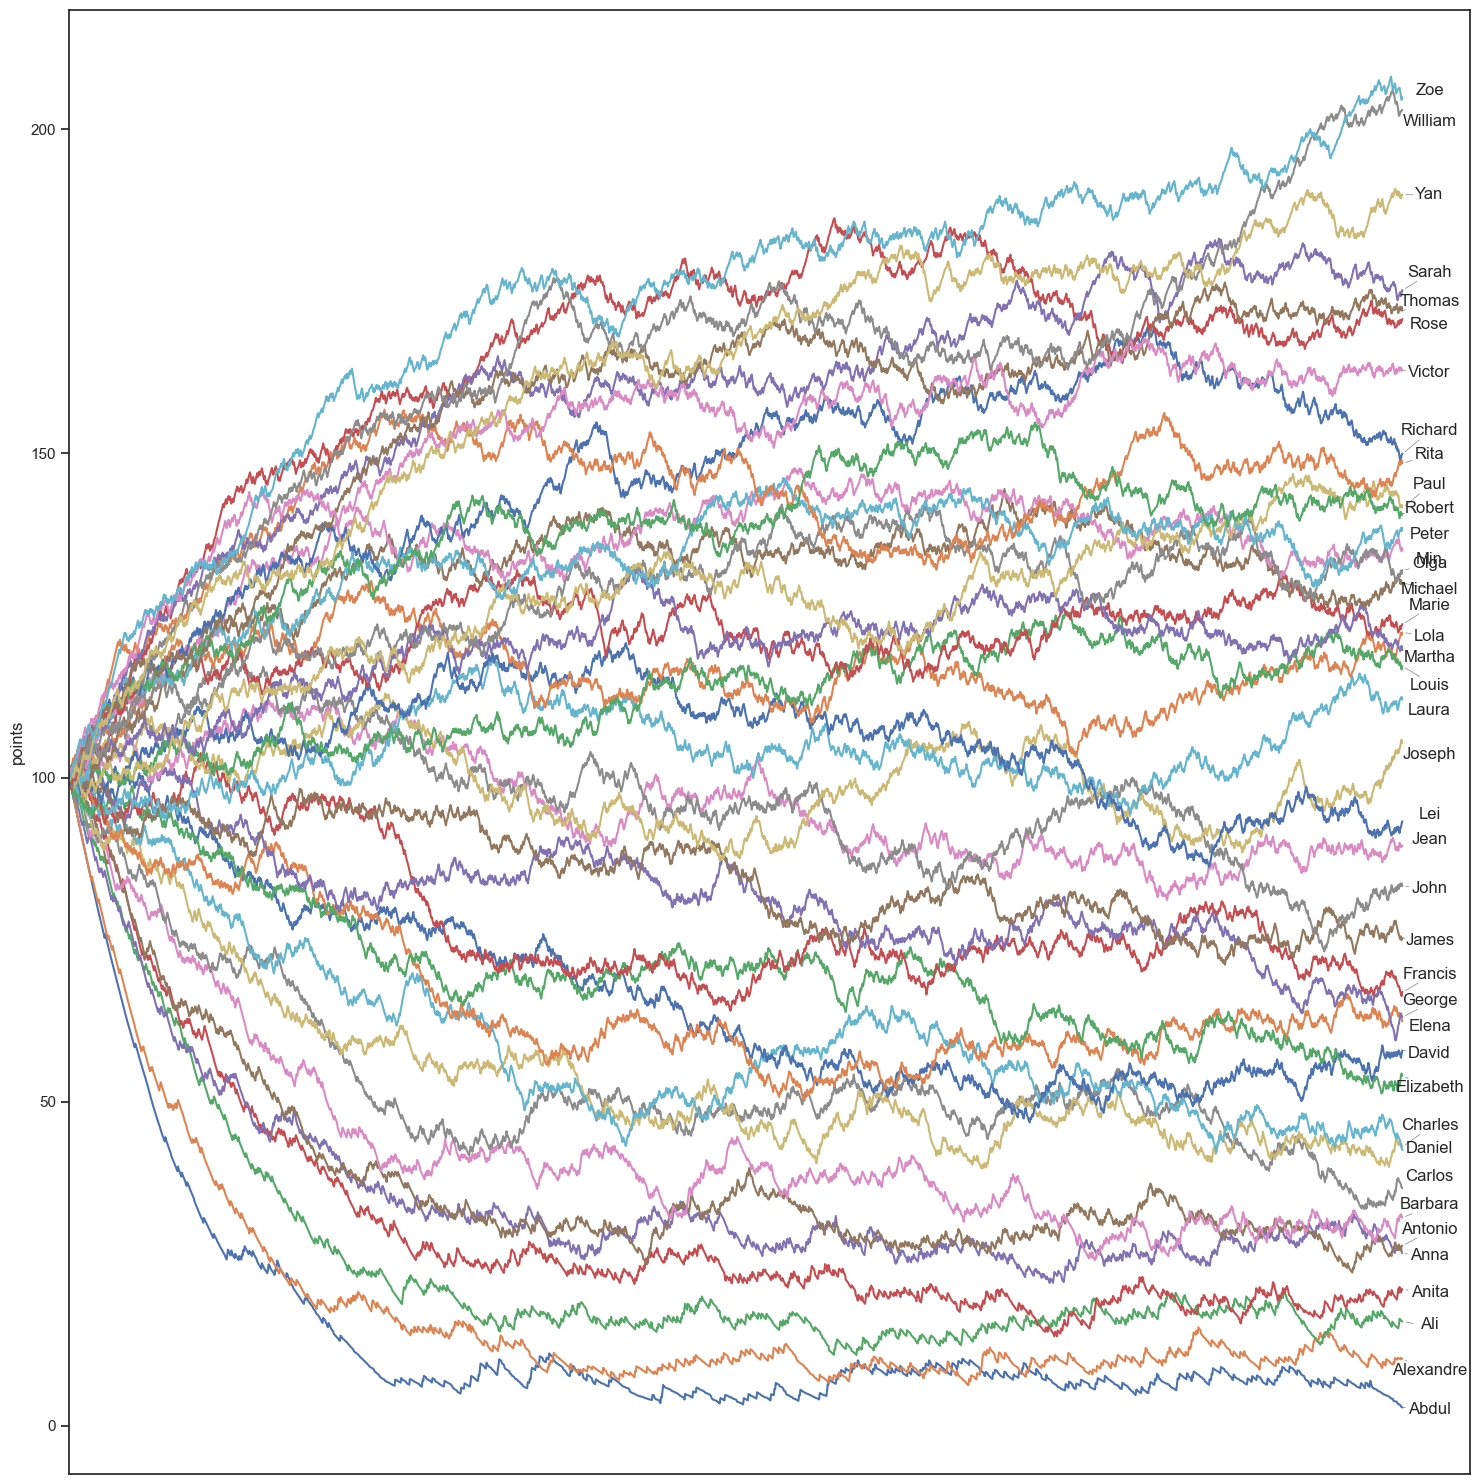

In [18]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_02.columns)

texts=[]

for player in df_score_02.index:
    scores = df_score_02.loc[player]
    plt.plot(df_score_02.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+40)

plt.xlim(-1, x_label + 100)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

In [21]:
players = df['Name'].to_list()
ratings = pd.Series(1000.0, index=players)

nb_rounds = 2000

df_score_03 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        estimate_pA = ratings[pA]
        estimate_pB =ratings[pB]
        
        estimate_prob_pA_win = (2**(estimate_pA/100)) / (2**(estimate_pA/100) + 2**(estimate_pB/100))

        lvl_pA = df[df['Name'] == pA].iloc[0]['Level']
        lvl_pB = df[df['Name'] == pB].iloc[0]['Level']

        real_prob_pA_win = lvl_pA / (lvl_pA + lvl_pB)

        win_pA = np.random.choice([1, 0], p=[real_prob_pA_win, 1- real_prob_pA_win])

        if win_pA:
            ratings[pA] += 1 - estimate_prob_pA_win
            ratings[pB] += 0 - ( 1 - estimate_prob_pA_win)
        else:
            ratings[pB] += 1 - (1 - estimate_prob_pA_win)
            ratings[pA] += 0 - estimate_prob_pA_win

    df_score_03[f'Round {i+1}'] = ratings.copy()

df_score_03

Round 1      Round 2      Round 3      Round 4      Round 5  \
Abdul       1000.5   999.998267  1000.500003   999.998270   999.496549   
Alexandre   1000.5  1000.998267  1000.494807   999.993087   999.493087   
Ali          999.5   999.001733   998.505196   998.005190   998.508649   
Anita        999.5   999.001733   999.501733   999.001733   999.500012   
Anna         999.5   999.001733   998.505193   998.010376   997.512097   
Antonio      999.5   999.000000   998.503463   998.008649   997.510370   
Barbara      999.5  1000.001733   999.501730  1000.003451   999.505175   
Carlos       999.5   999.001733   999.505193  1000.003454   999.503445   
Charles     1000.5  1000.998267  1001.494807  1000.993087  1000.493096   
Daniel       999.5   999.001733   998.501733   998.003472   997.508649   
David       1000.5  1001.000000  1000.498264   999.998270  1000.498282   
Elena        999.5   999.001733   999.505193   999.006916   998.510376   
Elizabeth    999.5   999.000000   998.503463   999.008649   998.512088   
Francis      999.5   999.001733   998.501733   999.001739   999.505205   
George      1000.5  1000.000000   999.501730   999.005187   999.506907   
James       1000.5   999.998267   999.500000  1000.001733   999.498273   
Jean         999.5   999.001733   998.503463   998.006919   997.510364   
John        1000.5  1000.000000   999.501730   999.003460   999.501739   
Joseph      1000.5  1000.998267  1001.496537  1001.991354  1001.489633   
Laura        999.5   999.000000   998.501733   998.006919   998.510367   
Lei          999.5  1000.000000  1000.501733  1001.001727  1000.498261   
Lola        1000.5  1000.000000  1000.498267  1000.994810  1001.496540   
Louis        999.5  1000.001733   999.501727  1000.003454  1000.506898   
Marie       1000.5  1000.998267  1001.494804  1000.993075  1001.489636   
Martha       999.5  1000.001733   999.501730  1000.003451   999.505175   
Michael     1000.5  1000.998267  1000.494807   999.993087  1000.493087   
Min          999.5   999.001733   999.501733  1000.001733  1000.505178   
Olga        1000.5   999.998267  1000.498273   999.998273  1000.498282   
Paul         999.5   999.000000   999.503466  1000.005187   999.505175   
Peter       1000.5  1001.000000  1001.496537  1000.991351  1001.486173   
Richard      999.5  1000.000000  1000.498270  1000.998270  1001.498261   
Rita         999.5  1000.000000  1000.500003  1000.998279  1001.496555   
Robert       999.5  1000.000000  1000.500003  1000.998273  1001.496549   
Rose        1000.5  1000.998267  1001.496534  1001.991348  1001.487903   
Sarah       1000.5  1000.998267  1000.496537  1000.998267  1001.499988   
Thomas      1000.5  1000.998267  1001.494804  1001.989618  1001.486173   
Victor      1000.5  1000.000000  1000.501730  1001.003451  1001.499991   
William     1000.5  1001.000000  1000.498267   999.996540   999.493093   
Yan         1000.5  1001.000000  1000.496534   999.994813  1000.491369   
Zoe         1000.5  1000.998267  1001.496537  1001.993081  1001.491351   

               Round 6      Round 7      Round 8      Round 9     Round 10  \
Abdul       998.996543   998.494837   998.991414   998.487996   997.993209   
Alexandre   999.993093   999.493105   999.994834   999.494831   998.991396   
Ali         998.012109   997.510373   997.019007   997.522424   997.024142   
Anita       999.000021   998.503487   998.008652   997.517280   998.025889   
Anna        997.015554   996.519007   996.022431   995.529326   995.034495   
Antonio     997.017277   996.524175   997.029344   996.534503   996.037930   
Barbara    1000.008607   999.510313   999.015473   999.515449   999.020591   
Carlos      999.006886   998.512061   998.017209   997.524092   997.025786   
Charles     999.994819   999.496534   999.001727   998.501751   998.008646   
Daniel      997.010385   997.512121   997.015574   996.524187   997.032800   
David      1001.000000  1001.496534  1000.993072  1001.493081  1000.989615   
Elena       998.012100   998.513806   99

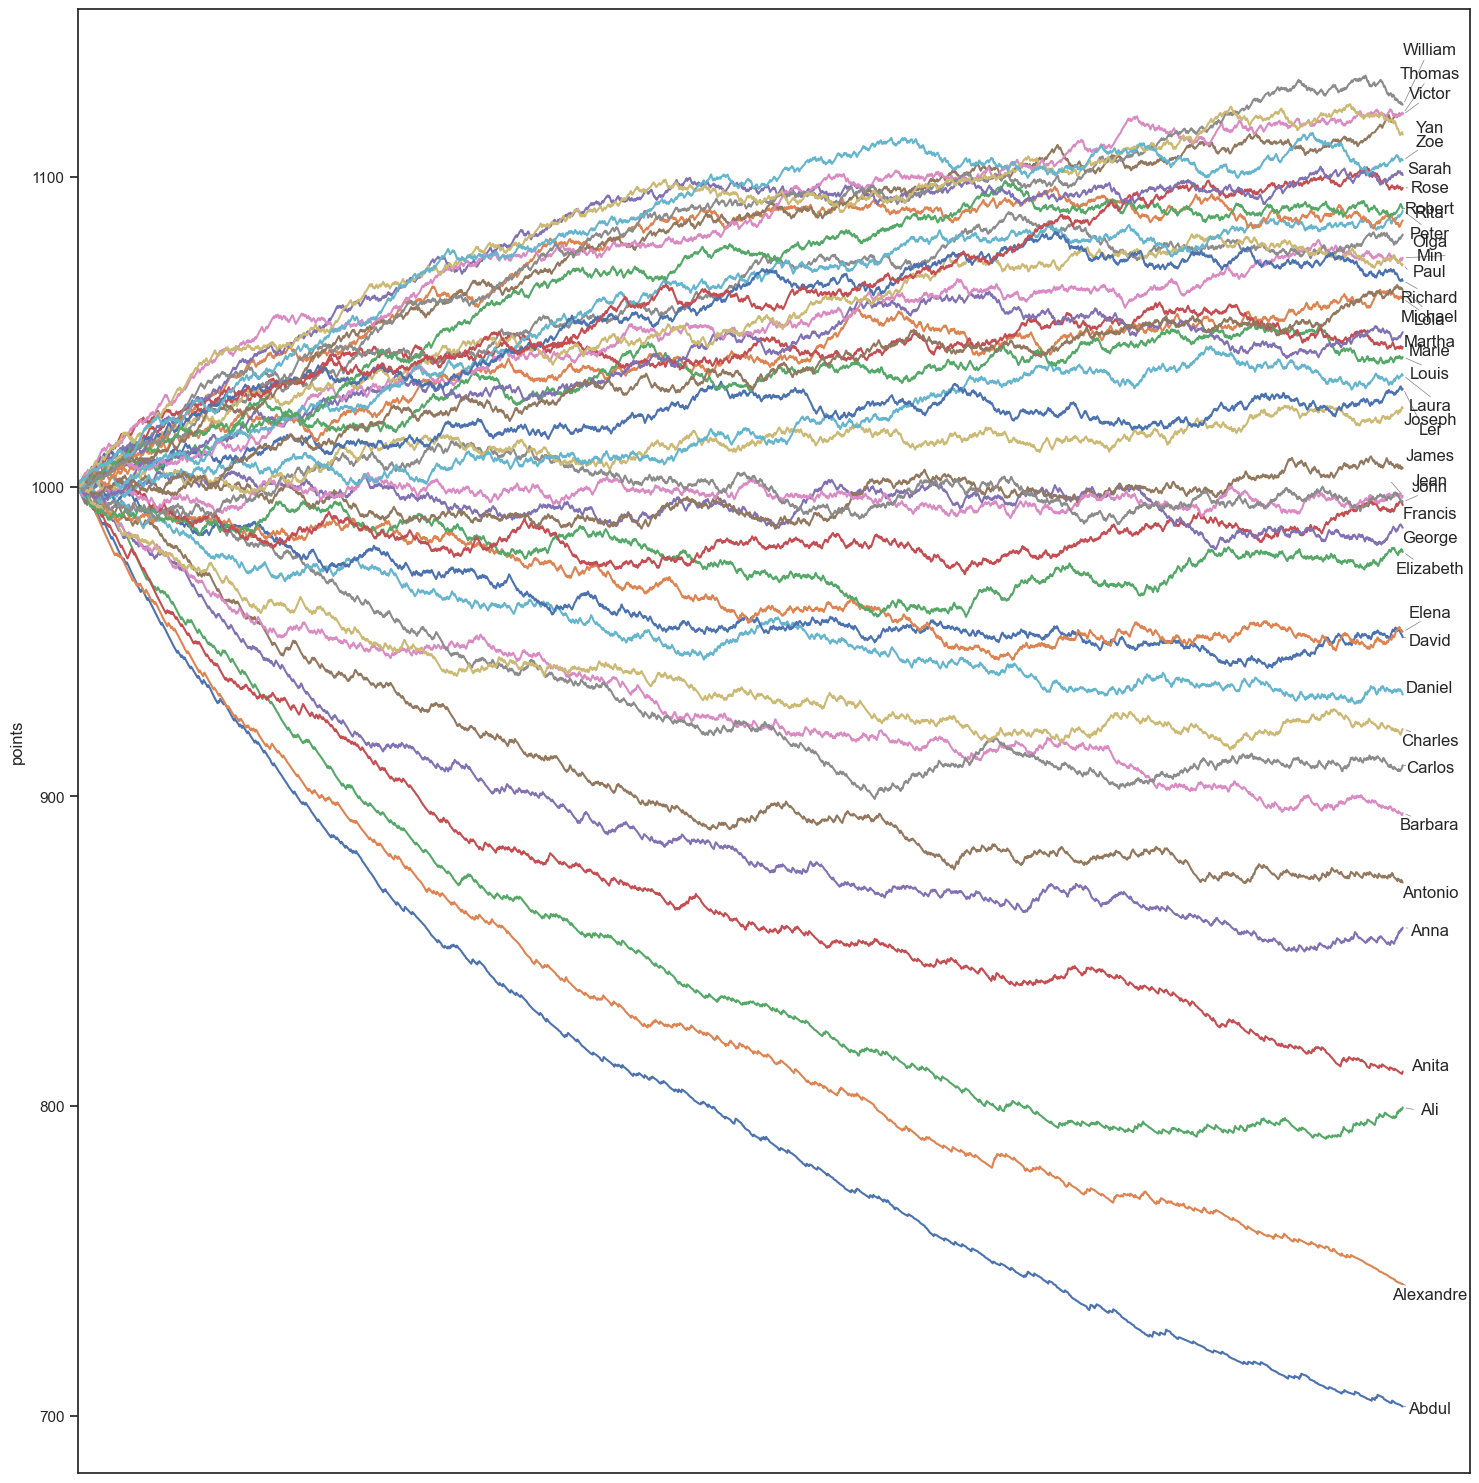

In [22]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_03.columns)

texts=[]

for player in df_score_03.index:
    scores = df_score_03.loc[player]
    plt.plot(df_score_03.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+40)

plt.xlim(-1, x_label + 100)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

In [23]:
players = df['Name'].to_list()
ratings = pd.Series(1000.0, index=players)

nb_rounds = 2000
K = 16.0

df_score_K = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        estimate_pA = ratings[pA]
        estimate_pB =ratings[pB]
        
        estimate_prob_pA_win = (2**(estimate_pA/100)) / (2**(estimate_pA/100) + 2**(estimate_pB/100))

        lvl_pA = df[df['Name'] == pA].iloc[0]['Level']
        lvl_pB = df[df['Name'] == pB].iloc[0]['Level']

        real_prob_pA_win = lvl_pA / (lvl_pA + lvl_pB)

        win_pA = np.random.choice([1, 0], p=[real_prob_pA_win, 1- real_prob_pA_win])

        if win_pA:
            ratings[pA] += K * (1 - estimate_prob_pA_win)
            ratings[pB] += K * (0 - ( 1 - estimate_prob_pA_win))
        else:
            ratings[pB] += K * (1 - (1 - estimate_prob_pA_win))
            ratings[pA] += K * (0 - estimate_prob_pA_win)

    df_score_K[f'Round {i+1}'] = ratings.copy()

df_score_K

Round 1     Round 2      Round 3      Round 4      Round 5  \
Abdul        992.0   984.00000   976.883609   969.731199   961.742936   
Alexandre    992.0   984.00000   976.000000   968.895744   962.179024   
Ali          992.0   984.44316   976.874070   969.721921   978.546858   
Anita        992.0  1000.44316   992.430873   984.418927   976.838934   
Anna         992.0  1000.44316   992.430873   984.850210   977.233835   
Antonio     1008.0  1016.00000  1023.116391  1014.257327  1022.270198   
Barbara      992.0   984.00000   976.883609   970.154522   978.142785   
Carlos       992.0  1000.44316   992.861817  1000.874372   993.268522   
Charles      992.0  1000.00000   991.987713   999.987713  1008.395463   
Daniel      1008.0  1015.55684  1023.138183  1014.706935  1006.299185   
David       1008.0  1000.00000   991.987713   984.407121   977.244196   
Elena       1008.0  1000.00000   991.987713   983.988054   976.848697   
Elizabeth    992.0   984.44316   993.314630   985.302075   978.149672   
Francis      992.0  1000.00000   992.012287   984.035841   976.094343   
George       992.0  1000.00000  1007.569090  1014.721240  1006.313764   
James        992.0  1000.00000   991.987713   983.987713   976.431548   
Jean        1008.0   999.55684  1007.569127  1016.000374  1008.383873   
John        1008.0   999.55684   992.000000   999.999659   992.406483   
Joseph      1008.0  1015.55684  1023.556840  1015.101842  1022.707692   
Laura        992.0  1000.44316   992.861817  1000.838264   993.199233   
Lei          992.0  1000.44316  1008.430873  1000.012145  1007.568309   
Lola         992.0   984.44316   976.430873   985.290536   977.722109   
Louis       1008.0  1016.00000  1007.128530  1014.709123  1021.872048   
Marie       1008.0  1000.00000  1007.569090   999.581378   990.756441   
Martha      1008.0  1000.00000  1008.012287  1016.000000  1008.000000   
Michael     1008.0   999.55684  1007.569127   999.581414  1007.161407   
Min         1008.0  1015.55684  1007.556840  1015.987825  1023.140228   
Olga         992.0   984.00000   992.000000  1000.011946  1008.419422   
Paul         992.0   984.00000   992.012287  1000.871351  1008.439778   
Peter        992.0   984.44316   976.874070   986.145903   994.087401   
Richard     1008.0   999.55684  1007.569127  1015.149790  1022.289147   
Rita         992.0  1000.00000  1008.443160  1015.547416  1023.164702   
Robert      1008.0  1015.55684  1023.113680  1029.842767  1037.459268   
Rose        1008.0  1000.00000  1008.012287  1015.999999  1023.999999   
Sarah       1008.0  1016.00000  1007.128530  1015.583528  1022.300248   
Thomas      1008.0  1016.00000  1007.556840   998.697177  1006.313552   
Victor      1008.0   999.55684  1007.569127  1014.721537  1006.708666   
William      992.0   984.44316   993.314630  1001.733358   994.116073   
Yan         1008.0  1016.00000  1023.116391  1014.685407  1022.278582   
Zoe         1008.0  1015.55684  1023.138183  1013.866349  1021.505379   

               Round 6      Round 7      Round 8      Round 9     Round 10  \
Abdul       954.544661   948.576697   942.556046   937.242430   931.030841   
Alexandre   955.844520   948.238810   941.543007   935.143128   929.449726   
Ali         971.360648   964.938874   973.260756   966.402678   958.356634   
Anita       970.088761   963.734756   972.493537   964.858749   957.978603   
Anna        970.094158   963.311248   972.870548   964.741971   972.788015   
Antonio    1014.282328  1005.526285   998.373668   990.497135   983.405058   
Barbara     986.932222   995.688265   988.903846   981.277686   974.700013   
Carlos      986.058992   995.253729   987.255398   979.700129   973.558216   
Charles     999.999877  1007.612099  1000.043813  1006.443692  1014.566336   
Daniel      998.357970   991.184542   982.425760   975.287440   984.608714   
David       970.070717   962.841428   956.812939   950.398740   944.321603   
Elena       970.077051   977.682761   969.702385   978.867565   972.766021   
Eli

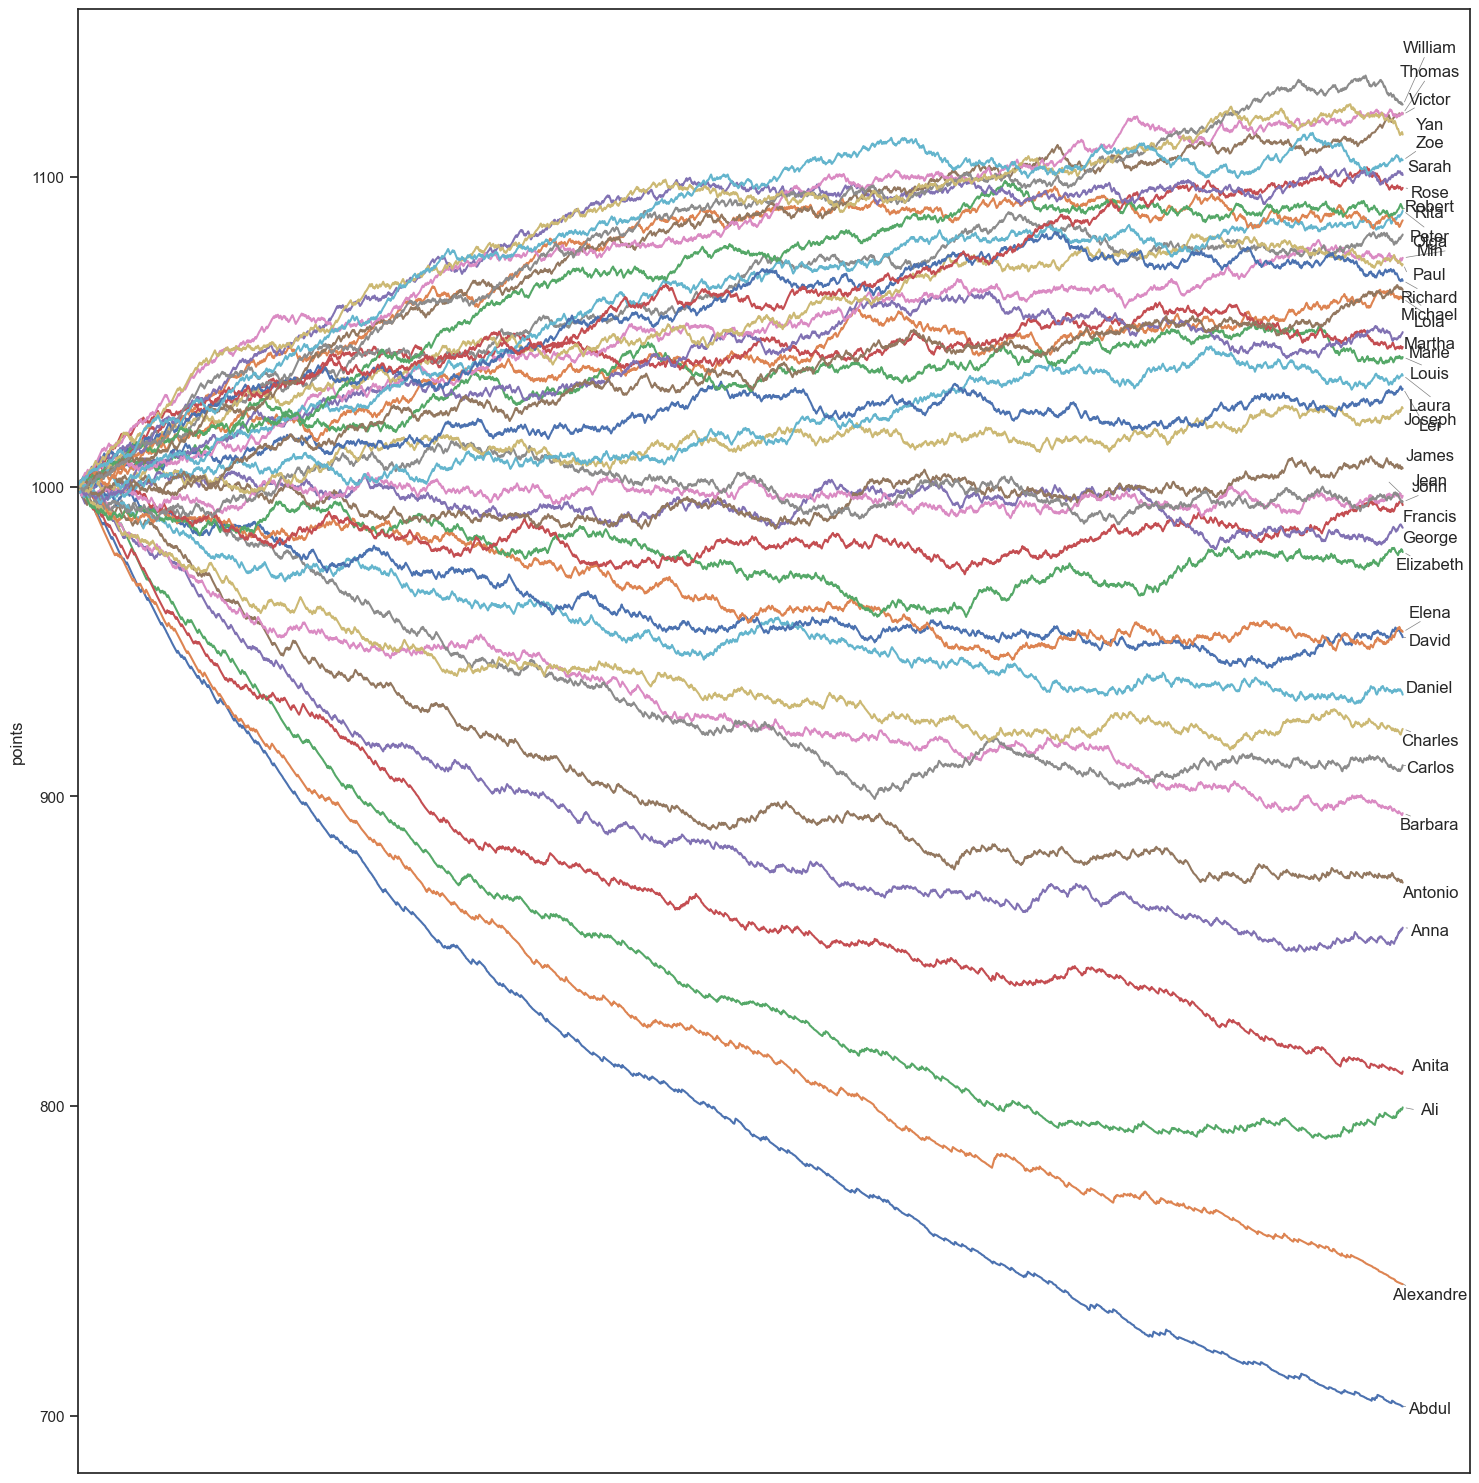

In [24]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_03.columns)

texts=[]

for player in df_score_03.index:
    scores = df_score_03.loc[player]
    plt.plot(df_score_03.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+40)

plt.xlim(-1, x_label + 100)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

In [25]:
players = df['Name'].to_list()
ratings = pd.Series(1000.0, index=players)

nb_rounds = 2000

df_score_adapt_K = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    K = 16.0 / (1+i/100)

    for pA, pB in duel:
        estimate_pA = ratings[pA]
        estimate_pB =ratings[pB]
        
        estimate_prob_pA_win = (2**(estimate_pA/100)) / (2**(estimate_pA/100) + 2**(estimate_pB/100))

        lvl_pA = df[df['Name'] == pA].iloc[0]['Level']
        lvl_pB = df[df['Name'] == pB].iloc[0]['Level']

        real_prob_pA_win = lvl_pA / (lvl_pA + lvl_pB)

        win_pA = np.random.choice([1, 0], p=[real_prob_pA_win, 1- real_prob_pA_win])

        if win_pA:
            ratings[pA] += K * (1 - estimate_prob_pA_win)
            ratings[pB] += K * (0 - ( 1 - estimate_prob_pA_win))
        else:
            ratings[pB] += K * (1 - (1 - estimate_prob_pA_win))
            ratings[pA] += K * (0 - estimate_prob_pA_win)

    df_score_adapt_K[f'Round {i+1}'] = ratings.copy()

df_score_adapt_K

Round 1      Round 2      Round 3      Round 4      Round 5  \
Abdul        992.0   984.517980   977.513299   969.723739   963.622579   
Alexandre    992.0   984.079208   977.086315   970.127421   963.229114   
Ali         1008.0  1000.079208   992.666248   985.721770   978.394653   
Anita       1008.0  1015.920792  1008.065728  1000.275988   993.380327   
Anna         992.0   984.517980   976.674843   984.464403   977.561365   
Antonio      992.0   999.920792   992.081961   985.130086   977.840545   
Barbara      992.0   984.079208   992.364413   985.004468   992.289744   
Carlos       992.0   984.517980   977.097422   970.149615   963.272292   
Charles      992.0  1000.359564   992.074360   999.438259   991.354467   
Daniel       992.0   984.079208   977.086315   969.722416   962.437139   
David        992.0   999.920792  1008.198400  1000.016884  1006.915191   
Elena        992.0   999.920792   992.070034  1000.251742  1007.541282   
Elizabeth   1008.0  1000.079208   991.801600   984.049671   992.181214   
Francis      992.0   984.517980   992.361118  1000.113047  1008.191006   
George       992.0   984.517980   976.674843   969.326534   963.245823   
James        992.0   984.079208   992.356816  1000.127987  1008.598713   
Jean        1008.0  1000.079208  1008.340631  1000.543376   992.411832   
John        1008.0  1015.482020  1022.474912  1013.900239  1006.272923   
Joseph       992.0   999.920792   992.512125   984.740955   992.824747   
Laura       1008.0  1015.920792  1007.215626  1014.174520  1021.077558   
Lei         1008.0  1015.482020  1023.337084  1030.281562  1036.382722   
Lola         992.0  1000.359564  1008.195081  1000.834906  1007.712229   
Louis       1008.0  1015.920792  1007.643184  1014.590991  1006.513032   
Marie       1008.0  1015.920792  1023.333752  1030.686171  1036.766882   
Martha      1008.0   999.640436   992.239366   984.456443   992.174337   
Michael      992.0   984.079208   992.352523   985.416191   977.698297   
Min         1008.0  1000.079208  1007.499766  1014.859711  1007.153417   
Olga        1008.0  1015.482020  1022.474912  1029.426787  1020.956062   
Paul        1008.0  1000.079208  1007.918039  1000.565620  1008.231971   
Peter       1008.0  1015.920792  1023.321862  1030.682037  1037.584916   
Richard      992.0   999.920792   991.647477   999.430400  1006.757517   
Rita        1008.0  1015.482020  1007.220597  1015.010337  1022.284480   
Robert      1008.0  1000.079208   992.243691   999.592000   991.925649   
Rose         992.0   984.517980   992.361118  1000.935791   993.618492   
Sarah        992.0   984.079208   992.784374  1000.965890   994.063011   
Thomas      1008.0  1015.482020  1007.216303  1015.013558  1022.330857   
Victor       992.0   999.920792  1008.186509  1016.338122  1023.965438   
William     1008.0  1015.482020  1022.486701  1014.335088  1022.041382   
Yan         1008.0  1015.920792  1023.329459  1030.265790  1037.161451   
Zoe         1008.0   999.640436  1007.491194   999.309486   992.035343   

               Round 6      Round 7      Round 8      Round 9     Round 10  \
Abdul       956.755186   965.058671   959.031417   952.319730   946.017853   
Alexandre   955.991814   949.961060   943.906727   953.150069   947.458446   
Ali         970.376656   963.223651   956.503542   950.165748   943.873170   
Anita       985.767569   977.464084   970.021259   964.447512   957.489003   
Anna        986.353182   978.768934   986.211758   992.923445   985.861511   
Antonio     971.756207   980.405014   974.362646   968.672496   963.320240   
Barbara     985.459885   992.612889   986.250354   979.178281   988.267742   
Carlos      971.290290   964.898173   958.136109   951.802486   946.218916   
Charles     984.166894   977.065548   970.380363   964.133172   957.853354   
Daniel      955.600552   949.172546   958.139325   952.145218   960.848528   
David       999.302434   992.499144   985.030062   977.987158   986.042896   
Elena       999.566591   992.790647  100

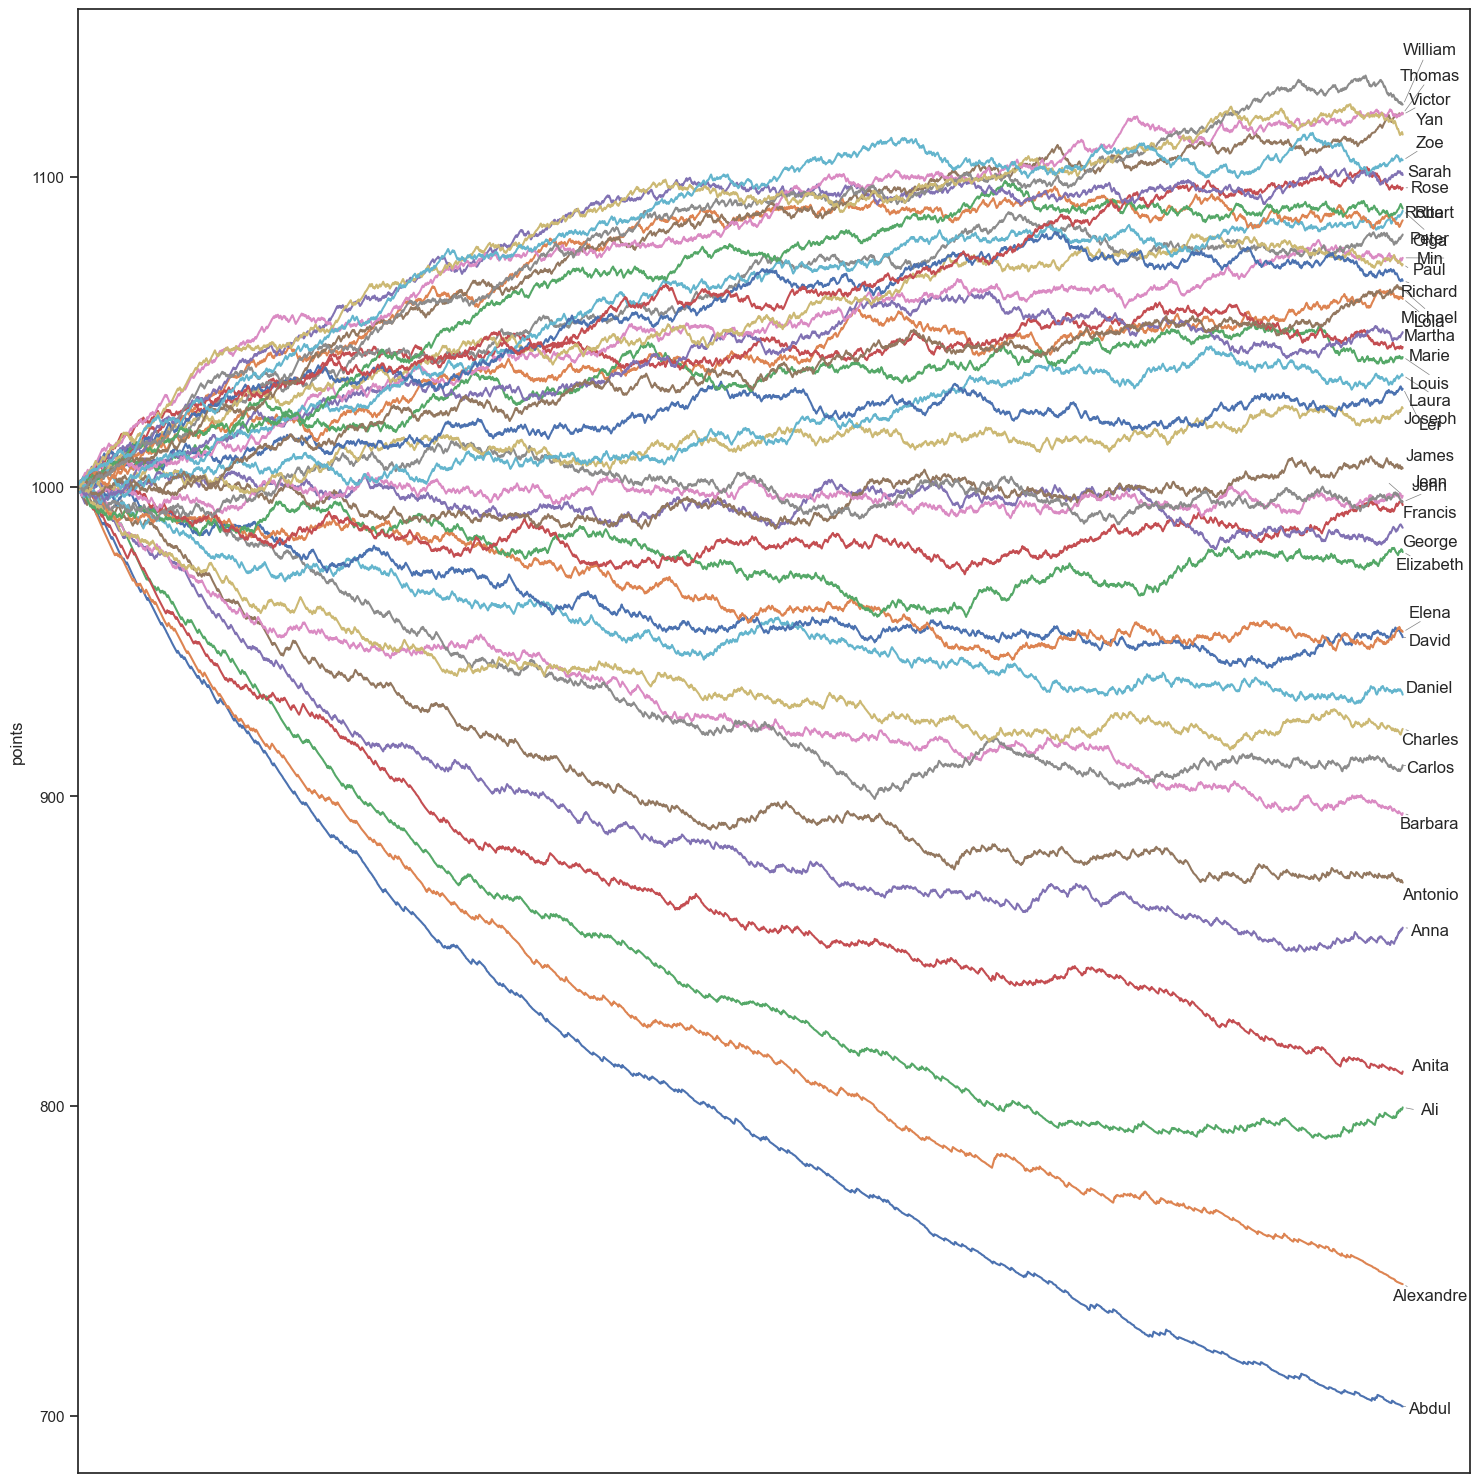

In [26]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_03.columns)

texts=[]

for player in df_score_03.index:
    scores = df_score_03.loc[player]
    plt.plot(df_score_03.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+40)

plt.xlim(-1, x_label + 100)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()